In [1]:
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(12345)

x = np.arange(0, 100) + np.random.normal(0, 3, size=100)

y = np.concatenate((
    np.random.normal(1, 0.5, size=10),
    np.random.normal(1, 0.5, size=10),
    np.random.normal(3, 0.5, size=10),
    np.random.normal(5, 0.5, size=40),
    np.random.normal(3, 0.5, size=30)
))

# init weights randomly
init_ww = {
    'w_10': .05,
    'w_11': .03,
    'w_12': .01,
    'w_13': .02,
    'w_20': .10,
    'w_21': .30,
    'w_22': .20
}

# bias, always 1
b_00 = 1
b_10 = 1

# activation function
f = lambda x: 2.7 ** x
# f = lambda x: np.maximum(0, x)
# f = lambda x: np.tanh(x)
# f = lambda x: np.log(1 + ( 2.7 ** x))

# deep learning network
def myDeep(ww, pt):
    x_11 = (b_00 * ww['w_10']) + (pt * ww['w_11'])
    x_12 = (b_00 * ww['w_12']) + (pt * ww['w_13'])
    a_11 = f(x_11)
    a_12 = f(x_12)
    return (b_10 * ww['w_20']) + (a_11 * ww['w_21']) + (a_12 * ww['w_22'])

def cost_function(y_pop, y_hat):
    return np.square(y_pop - y_hat).sum()

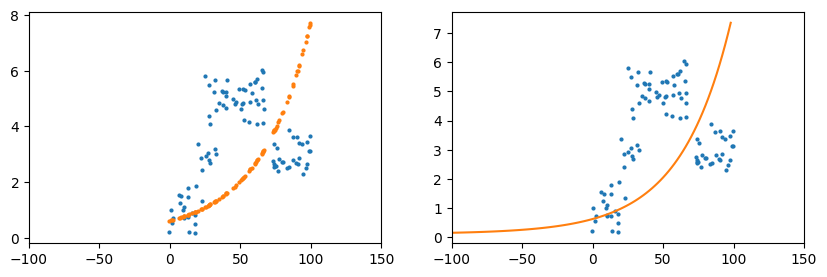

In [2]:
plt.rcParams['lines.markersize'] = 2
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))

axs[0].set_xlim(-100, 150)
axs[0].scatter(x, y);
axs[0].scatter(x, myDeep(init_ww, x));

domain = np.arange(-100, 100, 2)
axs[1].set_xlim(-100, 150)
axs[1].scatter(x, y);
axs[1].plot(domain, myDeep(init_ww, domain), color="#ff7f0f");

loss: 1215.7975133950501
grad_w_20 -611.7682771696309
grad_w_21 0.5937691275903489
grad_w_22 -288.0416357493232
grad_w_10 0.16988932202366414
grad_w_11 -1.2818785990020842
grad_w_12 -59.39446445381691
grad_w_13 -2855.3409875667057


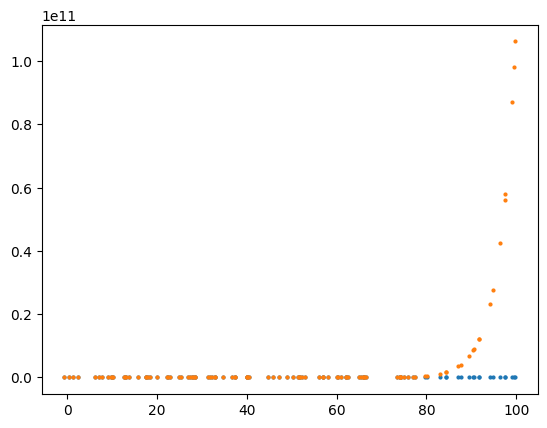

In [33]:
lr = 0.0001
dx = 0.0001

def calc_gard(prev_ww, curr_ww, y):
    copy_ww = prev_ww.copy()
    copy_ww[curr_ww] += dx
    prev_cost = cost_function(y, myDeep(prev_ww, x))
    curr_cost = cost_function(y, myDeep(copy_ww, x))
    return (curr_cost - prev_cost) / dx

for t in range(1):
    y_hat = myDeep(init_ww, x)
    loss = cost_function(y, y_hat)
    print("loss:", loss)

    # Backprop to compute gradients with respect to loss
    grad_w_10 = calc_gard(init_ww, 'w_10', y)
    grad_w_11 = calc_gard(init_ww, 'w_11', y)
    grad_w_12 = calc_gard(init_ww, 'w_12', y)
    grad_w_13 = calc_gard(init_ww, 'w_13', y)
    grad_w_20 = calc_gard(init_ww, 'w_20', y)
    grad_w_21 = calc_gard(init_ww, 'w_21', y)
    grad_w_22 = calc_gard(init_ww, 'w_22', y)

    print("grad_w_20", grad_w_20)
    print("grad_w_21", grad_w_21)
    print("grad_w_22", grad_w_22)
    print("grad_w_10", grad_w_10)
    print("grad_w_11", grad_w_11)
    print("grad_w_12", grad_w_12)
    print("grad_w_13", grad_w_13)

    # Update weights
    init_ww['w_10'] -= grad_w_10 * lr
    init_ww['w_11'] -= grad_w_11 * lr
    init_ww['w_12'] -= grad_w_12 * lr
    init_ww['w_13'] -= grad_w_13 * lr
    init_ww['w_20'] -= grad_w_20 * lr
    init_ww['w_21'] -= grad_w_21 * lr
    init_ww['w_22'] -= grad_w_22 * lr

    # Grads by math rules
#     grad_y_hat = 2.0 * (y_hat - y)
#     grad_w_20_m = grad_y_hat.sum()
#     grad_w_21_m = (grad_y_hat * f((b_00 * init_ww['w_10']) + (x * init_ww['w_11']))).sum()
#     grad_w_22_m = (grad_y_hat * f((b_00 * init_ww['w_12']) + (x * init_ww['w_13']))).sum()
#     grad_w_10_m = (grad_y_hat * init_ww['w_21'] * (2.7 ** ((b_00 * init_ww['w_10']) + (x * init_ww['w_11'])))).sum()
#     grad_w_11_m = (grad_y_hat * init_ww['w_21'] * (2.7 ** ((b_00 * init_ww['w_10']) + (x * init_ww['w_11']))) * x).sum()
#     grad_w_12_m = (grad_y_hat * init_ww['w_22'] * (2.7 ** ((b_00 * init_ww['w_12']) + (x * init_ww['w_13'])))).sum()
#     grad_w_13_m = (grad_y_hat * init_ww['w_22'] * (2.7 ** ((b_00 * init_ww['w_12']) + (x * init_ww['w_13']))) * x).sum()

#     print("grad_w_20_m", grad_w_20_m)
#     print("grad_w_21_m", grad_w_21_m)
#     print("grad_w_22_m", grad_w_22_m)
#     print("grad_w_10_m", grad_w_10_m)
#     print("grad_w_11_m", grad_w_11_m)
#     print("grad_w_12_m", grad_w_12_m)
#     print("grad_w_13_m", grad_w_13_m)

    # Update weights
    # init_ww['w_10'] -= grad_w_10_m * lr
    # init_ww['w_11'] -= grad_w_11_m * lr
    # init_ww['w_12'] -= grad_w_12_m * lr
    # init_ww['w_13'] -= grad_w_13_m * lr
    # init_ww['w_20'] -= grad_w_20_m * lr
    # init_ww['w_21'] -= grad_w_21_m * lr
    # init_ww['w_22'] -= grad_w_22_m * lr

plt.scatter(x, y);
plt.scatter(x, myDeep(init_ww, x));

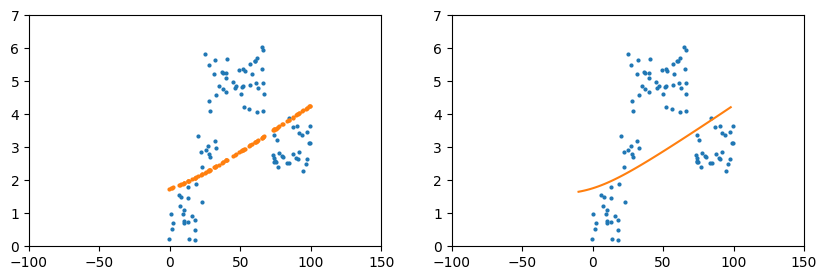

In [38]:
plt.rcParams['lines.markersize'] = 2
fig, axs = plt.subplots(ncols=2, figsize=(10, 3))

axs[0].set_xlim(-100, 150)
axs[0].set_ylim(0, 7)
axs[0].scatter(x, y);
axs[0].scatter(x, myDeep(init_ww, x));

domain = np.arange(-10, 100, 2)
axs[1].set_xlim(-100, 150)
axs[1].set_ylim(0, 7)
axs[1].scatter(x, y);
axs[1].plot(domain, myDeep(init_ww, domain), color="#ff7f0f");

In [78]:
init_ww

{'w_10': nan,
 'w_11': nan,
 'w_12': nan,
 'w_13': nan,
 'w_20': nan,
 'w_21': nan,
 'w_22': nan}